## Organize simulations

Purpose:
This script loads all .pkl files from the `data/raw` directory, each containing simulation results (e.g., configurations and polarization curves) that we have generated so far.

For each .pkl file:
- It checks if the file contains a pandas DataFrame
- It adds a `file_source` column with the filename for traceability
- It appends it to a list of DataFrames

At the end, all valid DataFrames are concatenated into a single combined DataFrame called `combined_df`, which can be used for further processing (e.g., labeling valid/invalid polarization curves, training classifiers and running IRD analysis)

In [ ]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from datetime import datetime 

import sys
sys.path.append("../external/AlphaPEM")

In [2]:
# Path to all the results from previous simulations ("raw" data)
data_path = r"..\data\raw"  

# Find all .pkl files
pkl_files = glob.glob(os.path.join(data_path, "*.pkl"))
print(pkl_files)

['..\\data\\raw\\LHS_seed42_nsamples160_ndimensions16.pkl', '..\\data\\raw\\morris_sample_results_N10_lev4.pkl', '..\\data\\raw\\morris_sample_results_N10_lev4_corrected.pkl', '..\\data\\raw\\N10_levels4_seed42.pkl', '..\\data\\raw\\PDP_20_default.pkl', '..\\data\\raw\\PDP_20_default_updated.pkl', '..\\data\\raw\\PDP_Sc_Phi_c_des_default.pkl', '..\\data\\raw\\results.pkl', '..\\data\\raw\\sobol_1_seed42.pkl', '..\\data\\raw\\sobol_N10_seed42.pkl', '..\\data\\raw\\try_combinations_after_rev_conf2.pkl', '..\\data\\raw\\try_combinations_after_rev_conf3.pkl']


In [3]:
# Read and combine
all_dfs = []

for file in pkl_files:
    try:
        df = pd.read_pickle(file)
        if isinstance(df, pd.DataFrame):
            df["file_source"] = os.path.basename(file)
            all_dfs.append(df)
        else:
            print(f"Skipped {file}: not a DataFrame")
    except Exception as e:
        print(f"Error reading {file}: {e}")


In [4]:
# Concatenate all loaded data
if all_dfs:
    combined_df = pd.concat(all_dfs, ignore_index=True)
    print("Loaded and combined", len(all_dfs), "files.")
    print("Shape:", combined_df.shape)
    print("Columns:", combined_df.columns.tolist())
else:
    print("No valid dfs loaded.")

combined_df["file_source"] = combined_df["file_source"].astype("str")

Loaded and combined 12 files.
Shape: (2525, 49)
Columns: ['Tfc', 'Pa_des', 'Sc', 'Phi_c_des', 'epsilon_gdl', 'tau', 'epsilon_mc', 'epsilon_c', 'e', 'Re', 'i0_c_ref', 'kappa_co', 'kappa_c', 'a_slim', 'b_slim', 'a_switch', 'Pc_des', 't_step', 'i_step', 'delta_pola', 'i_EIS', 'ratio_EIS', 'f_EIS', 't_EIS', 'current_density', 'max_step', 'n_gdl', 't_purge', 'type_fuel_cell', 'type_current', 'type_auxiliary', 'type_control', 'type_purge', 'type_display', 'type_plot', 'C_scl', 'i_max_pola', 'Aact', 'Hgdl', 'Hmem', 'Hcl', 'Hgc', 'Wgc', 'Lgc', 'Sa', 'Phi_a_des', 'ifc', 'Ucell', 'file_source']


In [5]:
object_cols = combined_df.select_dtypes(include='object').columns.tolist()
print("Object columns:")
print(object_cols)

Object columns:
['t_step', 'i_step', 'delta_pola', 'f_EIS', 't_EIS', 'current_density', 't_purge', 'type_fuel_cell', 'type_current', 'type_auxiliary', 'type_control', 'type_purge', 'type_display', 'type_plot', 'ifc', 'Ucell', 'file_source']


In [6]:
combined_df = combined_df.reset_index(drop=True)
combined_df["id"] = combined_df.index   # Add an id column to identify each simulation
col = combined_df.pop('id') 
combined_df.insert(0, 'id', col)
combined_df.head()

,id,Tfc,Pa_des,Sc,Phi_c_des,epsilon_gdl,tau,epsilon_mc,epsilon_c,e,...,Hmem,Hcl,Hgc,Wgc,Lgc,Sa,Phi_a_des,ifc,Ucell,file_source
0,0,338.667402,265533.590590,1.208556,0.251135,0.785790,1.037960,0.162873,0.254263,5.0,...,0.00002,0.00001,0.0005,0.00045,9.67,1.3,0.5,"[0.0008076958344422846, 0.10080631382034516, 0...","[6.597591515083532, 6.486017238747574, 6.38909...",LHS_seed42_nsamples160_ndimensions16.pkl
1,1,340.396031,195807.232551,2.099547,0.476381,0.719128,2.680852,0.175046,0.179163,4.0,...,0.00002,0.00001,0.0005,0.00045,9.67,1.3,0.5,"[0.0008248266389767942, 0.10082347356122628, 0...","[4.332333802060889, 4.029204325900632, 3.84504...",LHS_seed42_nsamples160_ndimensions16.pkl
2,2,353.938896,237981.340600,1.616925,0.466789,0.795109,2.378581,0.343395,0.199997,5.0,...,0.00002,0.00001,0.0005,0.00045,9.67,1.3,0.5,"[0.000816644892111956, 0.10081527814567956, 0....","[1.53335009280079, 1.481902396707944, 1.439160...",LHS_seed42_nsamples160_ndimensions16.pkl
3,3,350.872026,293476.356033,2.890749,0.373722,0.572208,3.481282,0.184836,0.184893,5.0,...,0.00002,0.00001,0.0005,0.00045,9.67,1.3,0.5,"[0.000810305555017704, 0.1008089280281028, 0.2...","[5.15056819926698, 4.3409121982378736, 3.75050...",LHS_seed42_nsamples160_ndimensions16.pkl
4,4,333.068520,267536.716813,1.295236,0.676360,0.723389,2.641811,0.210602,0.286492,5.0,...,0.00002,0.00001,0.0005,0.00045,9.67,1.3,0.5,"[0.000816785557194638, 0.10081541904807523, 0....","[1.5704053112314313, 1.4715582360854038, 1.386...",LHS_seed42_nsamples160_ndimensions16.pkl


### Explore the samples

Here I want to take all the combined simulation data and organizing it into two separate tables:

- One table (`polarization_df`) contains the polarization curves. We want to unpack the `ifc` and `Ucell` vectors into one column per value, and kept the `id` for reference
- Another table (`config_df`) contains all the configuration parameters used in the simulations, plus the `file_source`, so I know where each run came from

In [7]:
exclude_cols = ["ifc", "Ucell"]
config_columns = [col for col in combined_df.columns if col not in exclude_cols]
config_df = combined_df[config_columns].copy()
config_df.head()

,id,Tfc,Pa_des,Sc,Phi_c_des,epsilon_gdl,tau,epsilon_mc,epsilon_c,e,...,Aact,Hgdl,Hmem,Hcl,Hgc,Wgc,Lgc,Sa,Phi_a_des,file_source
0,0,338.667402,265533.590590,1.208556,0.251135,0.785790,1.037960,0.162873,0.254263,5.0,...,0.0085,0.0002,0.00002,0.00001,0.0005,0.00045,9.67,1.3,0.5,LHS_seed42_nsamples160_ndimensions16.pkl
1,1,340.396031,195807.232551,2.099547,0.476381,0.719128,2.680852,0.175046,0.179163,4.0,...,0.0085,0.0002,0.00002,0.00001,0.0005,0.00045,9.67,1.3,0.5,LHS_seed42_nsamples160_ndimensions16.pkl
2,2,353.938896,237981.340600,1.616925,0.466789,0.795109,2.378581,0.343395,0.199997,5.0,...,0.0085,0.0002,0.00002,0.00001,0.0005,0.00045,9.67,1.3,0.5,LHS_seed42_nsamples160_ndimensions16.pkl
3,3,350.872026,293476.356033,2.890749,0.373722,0.572208,3.481282,0.184836,0.184893,5.0,...,0.0085,0.0002,0.00002,0.00001,0.0005,0.00045,9.67,1.3,0.5,LHS_seed42_nsamples160_ndimensions16.pkl
4,4,333.068520,267536.716813,1.295236,0.676360,0.723389,2.641811,0.210602,0.286492,5.0,...,0.0085,0.0002,0.00002,0.00001,0.0005,0.00045,9.67,1.3,0.5,LHS_seed42_nsamples160_ndimensions16.pkl


In [8]:
curves_df = combined_df[["id", "ifc", "Ucell"]].copy()

# Expand 'ifc'
ifc_expanded = pd.DataFrame(curves_df["ifc"].to_list(), index=curves_df["id"])
ifc_expanded.columns = [f"ifc_{i}" for i in ifc_expanded.columns]

# Expand 'Ucell'
ucell_expanded = pd.DataFrame(curves_df["Ucell"].to_list(), index=curves_df["id"])
ucell_expanded.columns = [f"Ucell_{i}" for i in ucell_expanded.columns]

# Combine into one polarization curve DataFrame
polarization_df = pd.concat([curves_df["id"], ifc_expanded, ucell_expanded], axis=1)
polarization_df.head()

,id,ifc_0,ifc_1,ifc_2,ifc_3,ifc_4,ifc_5,ifc_6,ifc_7,ifc_8,...,Ucell_21,Ucell_22,Ucell_23,Ucell_24,Ucell_25,Ucell_26,Ucell_27,Ucell_28,Ucell_29,Ucell_30
0,0,0.000808,0.100806,0.200806,0.300806,0.400806,0.500806,0.600806,0.700806,0.800806,...,4.608796,4.502096,4.393298,4.282212,4.168552,4.052273,3.933326,3.811583,3.686896,3.559106
1,1,0.000825,0.100823,0.200823,0.300823,0.400823,0.500823,0.600823,0.700823,0.800823,...,1.314970,1.194769,1.074916,0.955326,0.835913,0.716599,0.597304,0.477952,0.358470,0.238783
2,2,0.000817,0.100815,0.200815,0.300815,0.400815,0.500815,0.600815,0.700815,0.800815,...,0.940413,0.916393,0.892365,0.868311,0.844214,0.820056,0.795823,0.771497,0.747063,0.722505
3,3,0.000810,0.100809,0.200809,0.300809,0.400809,0.500809,0.600809,0.700809,0.800809,...,-1.508725,-1.794145,-2.079815,-2.366530,-2.654702,-2.944677,-3.236814,-3.531496,-3.829135,-4.130183
4,4,0.000817,0.100815,0.200815,0.300815,0.400815,0.500815,0.600815,0.700815,0.800815,...,0.188276,0.129702,0.071043,0.012297,-0.046564,-0.105608,-0.164945,-0.224595,-0.284493,-0.344723


#### Filter out duplicate simulation configurations

I'm defining the (variable) input parameters, keeping only one row per unique configuration (even if it was simulated multiple times). Then I filter the polarization curves to match only these unique configs


In [9]:
# Operating conditions
ls_operating_conditions = [
    "Tfc", "Pa_des", "Pc_des", "Sa", "Sc", "Phi_a_des", "Phi_c_des"
]

# Undetermined physical parameters
ls_undetermined_physical_parameters = [
    "epsilon_gdl", "tau", "epsilon_mc", "epsilon_c", "e", "Re", "i0_c_ref",
    "kappa_co", "kappa_c", "a_slim", "b_slim", "a_switch"
]

desired_columns = ["id"] + ls_operating_conditions + ls_undetermined_physical_parameters

config_var_df = config_df[desired_columns].copy()
print("Number of simulations before filtering duplicates:", len(config_var_df))

# Drop duplicates based on configuration values only
config_var_df = config_var_df.drop_duplicates(subset = ls_operating_conditions + ls_undetermined_physical_parameters)

# Filter polarization_df accordingly
polarization_df = polarization_df[polarization_df["id"].isin(config_var_df["id"])]

print("Remaining polarization curves:", len(polarization_df))

Number of simulations before filtering duplicates: 2525
Remaining polarization curves: 1962


#### Check fixed parameters

These object-type columns aren't part of the input parameters and should be fixed across all simulations. I'm printing how many unique values each has to confirm that

In [10]:
selected_columns = ls_operating_conditions + ls_undetermined_physical_parameters

object_cols = config_df.select_dtypes(include='object').columns
other_object_cols = [col for col in object_cols if col not in selected_columns]

for col in other_object_cols:
    try:
        unique_vals = config_df[col].apply(lambda x: str(x)).unique()
        print(f"{col} ({len(unique_vals)} unique values): {unique_vals}")
    except Exception as e:
        print(f"Error in column '{col}': {e}")

t_step (1 unique values): ['(0, 1000, 50, 10)']
i_step (1 unique values): ['(5000.0, 15000.0)']
delta_pola (1 unique values): ['(30, 30, 1000.0, 60)']
f_EIS (1 unique values): ['(-3, 5, 90, 50)']
t_EIS (1 unique values): ['(np.float64(1000.0), array([  1000.        , 101000.        , 182304.08367888, 248407.6239075 ,\n       302152.50156968, 345849.28187725, 381376.5487035 , 410261.66745272,\n       433746.44857134, 452840.53466382, 468364.80639817, 480986.6732796 ,\n       491248.76649071, 499592.26734228, 506375.87425639, 511891.22369829,\n       516375.4280237 , 520021.26926077, 522985.48707096, 525395.51719978,\n       527354.9701124 , 528948.08534813, 530243.35309248, 531296.45866322,\n       532152.67649768, 532848.81656228, 533414.80686292, 533874.98009058,\n       534249.11971665, 534553.31051131, 534800.63004955, 535001.71093387,\n       535165.19790432, 535298.11948758, 535406.19016286, 535494.05603512,\n       535565.49457743, 535623.57702965, 535670.80043521, 535709.1949923

#### Coefficient of Variation for `ifc_` columns

Since the `ifc` values represent the same current density grid across all simulations, the coef. of variation values should ideally be very small




In [11]:
ifc_columns = [col for col in polarization_df.columns if col.startswith("ifc_")]

cv_series = (polarization_df[ifc_columns].std() / polarization_df[ifc_columns].mean())
cv_df = cv_series.to_frame().T
cv_df.index = ['coef_variation'] 

cv_df

,ifc_0,ifc_1,ifc_2,ifc_3,ifc_4,ifc_5,ifc_6,ifc_7,ifc_8,ifc_9,...,ifc_21,ifc_22,ifc_23,ifc_24,ifc_25,ifc_26,ifc_27,ifc_28,ifc_29,ifc_30
coef_variation,0.039853,0.039143,0.039143,0.039143,0.039143,0.039143,0.039143,0.039143,0.039143,0.039143,...,0.039143,0.039143,0.039143,0.039143,0.039143,0.039143,0.039143,0.039143,0.039143,0.039143


### Classification of polarization curves: Validity criteria

This code adds three checks to identify valid polarization curves: the first value should be between 0–1.23V, the next 4 also in range, and the curve must decrease monotonically

In [12]:
ucell_cols = [col for col in polarization_df.columns if col.startswith("Ucell_")]

# Condition 1: First value in range
polarization_df["start_in_range"] = polarization_df[ucell_cols[0]].between(0, 1.23)

# Condition 2: First x values in range
tolerance = 3  # Number of steps in the current density
polarization_df["early_values_in_range"] = polarization_df[ucell_cols[:tolerance]].apply(
    lambda row: row.between(0, 1.23).all(), axis=1
)

# Condition 3: Monotonic decreasing
polarization_df["monotonic"] = polarization_df[ucell_cols].apply(
    lambda row: all(x >= y for x, y in zip(row, row[1:])), axis=1
)

# Condition 4
minimum_voltage_allowed = -5
polarization_df["minimum_voltage"] = polarization_df[ucell_cols[-1]] > minimum_voltage_allowed

conditions_cols = ["start_in_range", "early_values_in_range", "monotonic", "minimum_voltage"]

# Final classification
polarization_df["classification"] = polarization_df[conditions_cols].all(axis=1)
polarization_df["classification"] = polarization_df["classification"].map({True: "valid", False: "invalid"})

polarization_df.head()

,id,ifc_0,ifc_1,ifc_2,ifc_3,ifc_4,ifc_5,ifc_6,ifc_7,ifc_8,...,Ucell_26,Ucell_27,Ucell_28,Ucell_29,Ucell_30,start_in_range,early_values_in_range,monotonic,minimum_voltage,classification
0,0,0.000808,0.100806,0.200806,0.300806,0.400806,0.500806,0.600806,0.700806,0.800806,...,4.052273,3.933326,3.811583,3.686896,3.559106,False,False,True,True,invalid
1,1,0.000825,0.100823,0.200823,0.300823,0.400823,0.500823,0.600823,0.700823,0.800823,...,0.716599,0.597304,0.477952,0.358470,0.238783,False,False,True,True,invalid
2,2,0.000817,0.100815,0.200815,0.300815,0.400815,0.500815,0.600815,0.700815,0.800815,...,0.820056,0.795823,0.771497,0.747063,0.722505,False,False,True,True,invalid
3,3,0.000810,0.100809,0.200809,0.300809,0.400809,0.500809,0.600809,0.700809,0.800809,...,-2.944677,-3.236814,-3.531496,-3.829135,-4.130183,False,False,True,True,invalid
4,4,0.000817,0.100815,0.200815,0.300815,0.400815,0.500815,0.600815,0.700815,0.800815,...,-0.105608,-0.164945,-0.224595,-0.284493,-0.344723,False,False,True,True,invalid


In [13]:
def plot_polarization_curve(row):
    voltages = row[ucell_cols].values
    current_density = range(len(voltages))
    
    plt.figure(figsize=(8, 5))
    plt.plot(current_density, voltages, marker='o', label=f"ID: {row.name}")
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.title("Polarization Curve")
    plt.xlabel("Current density index (Arbitrary)")
    plt.ylabel("Voltage (V)")
    plt.grid(True)
    plt.legend()
    plt.show()

In [14]:
check_cols = conditions_cols + ["classification"]
polarization_df["classification_bool"] = polarization_df["classification"] == "valid"

summary = pd.DataFrame()

for col in check_cols[:-1]:
    counts = polarization_df[col].value_counts().reindex([True, False], fill_value=0)
    total = counts.sum()
    summary[col] = [f"{counts[True]} ({counts[True]/total:.1%})", f"{counts[False]} ({counts[False]/total:.1%})"]

classification_counts = polarization_df["classification"].value_counts()
total = classification_counts.sum()
summary["valid PC"] = [
    f"{classification_counts.get('valid', 0)} ({classification_counts.get('valid', 0)/total:.1%})",
    f"{classification_counts.get('invalid', 0)} ({classification_counts.get('invalid', 0)/total:.1%})"
]

polarization_df = polarization_df.drop(columns = ["classification_bool"])

summary.index = ["True", "False"]
summary

,start_in_range,early_values_in_range,monotonic,minimum_voltage,valid PC
True,1246 (63.5%),1216 (62.0%),1778 (90.6%),1835 (93.5%),1168 (59.5%)
False,716 (36.5%),746 (38.0%),184 (9.4%),127 (6.5%),794 (40.5%)


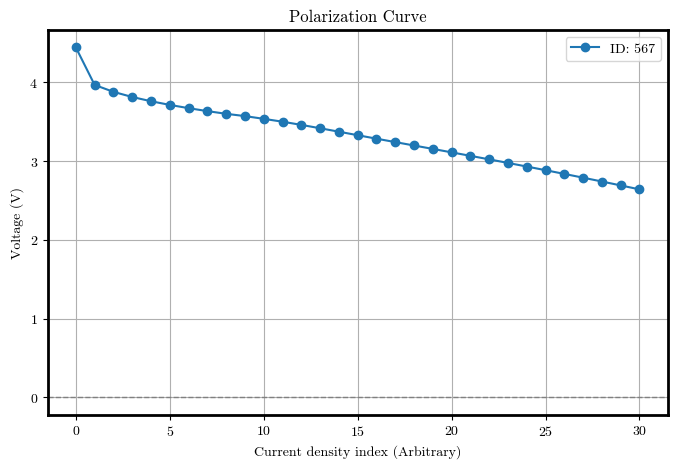

In [16]:
plot_polarization_curve(polarization_df.loc[567, :])

In [17]:
polarization_df[(polarization_df["start_in_range"] == True) &(polarization_df["early_values_in_range"] == False)][["id"] + check_cols].head()

,id,start_in_range,early_values_in_range,monotonic,minimum_voltage,classification
13,13,True,False,False,False,invalid
61,61,True,False,True,False,invalid
179,179,True,False,True,False,invalid
223,223,True,False,True,True,invalid
240,240,True,False,True,False,invalid


In [18]:
polarization_df[(polarization_df["monotonic"] == False) ][["id","start_in_range", "early_values_in_range", "monotonic"]].head()

,id,start_in_range,early_values_in_range,monotonic
13,13,True,False,False
20,20,False,False,False
51,51,False,False,False
58,58,False,False,False
117,117,False,False,False


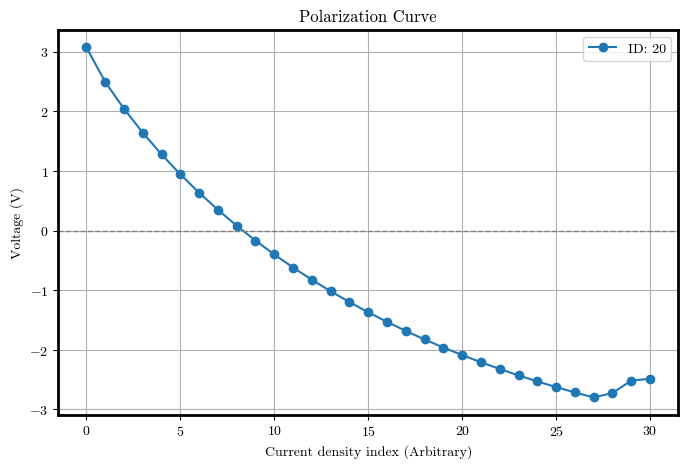

In [19]:
plot_polarization_curve(polarization_df.loc[20, :])

In [20]:
config_var_df[config_var_df["id"] == 21]

,id,Tfc,Pa_des,Pc_des,Sa,Sc,Phi_a_des,Phi_c_des,epsilon_gdl,tau,epsilon_mc,epsilon_c,e,Re,i0_c_ref,kappa_co,kappa_c,a_slim,b_slim,a_switch
21,21,345.732174,289666.277812,287666.277812,1.3,1.787747,0.5,0.212741,0.691973,3.850768,0.381561,0.159756,4.0,0.000004,31.42004,37.937134,19.631263,0.955655,0.408649,0.41768


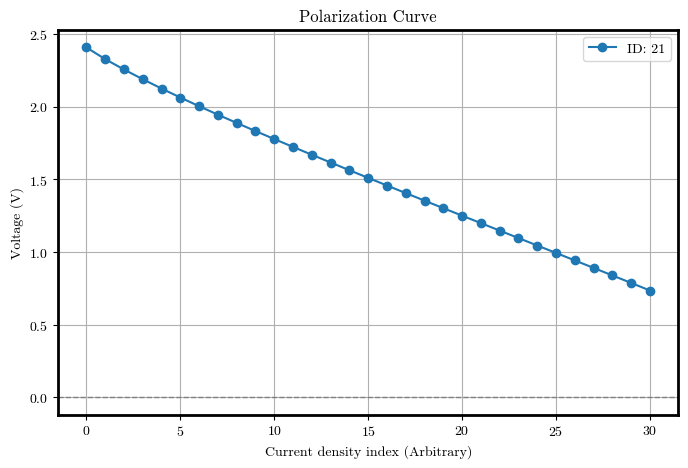

In [21]:
plot_polarization_curve(polarization_df.iloc[21, :])

#### Final configurations dataset + conditions for validity

In [22]:
config_var_df = pd.merge(config_var_df, polarization_df[["id"] + check_cols], on="id", how="left")
config_var_df.head()

,id,Tfc,Pa_des,Pc_des,Sa,Sc,Phi_a_des,Phi_c_des,epsilon_gdl,tau,...,kappa_co,kappa_c,a_slim,b_slim,a_switch,start_in_range,early_values_in_range,monotonic,minimum_voltage,classification
0,0,338.667402,265533.590590,263533.590590,1.3,1.208556,0.5,0.251135,0.785790,1.037960,...,16.774123,80.222524,0.907357,0.772228,0.961079,False,False,True,True,invalid
1,1,340.396031,195807.232551,193807.232551,1.3,2.099547,0.5,0.476381,0.719128,2.680852,...,12.246005,51.778566,0.439481,0.276596,0.368953,False,False,True,True,invalid
2,2,353.938896,237981.340600,235981.340600,1.3,1.616925,0.5,0.466789,0.795109,2.378581,...,36.672707,8.854920,0.188721,0.778828,0.698198,False,False,True,True,invalid
3,3,350.872026,293476.356033,291476.356033,1.3,2.890749,0.5,0.373722,0.572208,3.481282,...,5.230092,45.207258,0.253306,0.040218,0.738968,False,False,True,True,invalid
4,4,333.068520,267536.716813,265536.716813,1.3,1.295236,0.5,0.676360,0.723389,2.641811,...,36.180577,9.816584,0.070864,0.602768,0.388851,False,False,True,True,invalid


Check that the pressure of the anode should be more than the pressure of the cathode -> we basically want to assert that Pa_des >= Pc_des

In [23]:
# Filter: Pa_des <= Pc_des
filtered_df = config_var_df[config_var_df["Pa_des"] <= config_var_df["Pc_des"]]

# Print value counts for 'classification'
filtered_df["classification"].value_counts()

classification
valid      999
invalid     36
Name: count, dtype: int64

In [ ]:
# Filter: Pa_des <= Pc_des
filtered_df = config_var_df[config_var_df["Pa_des"] >= config_var_df["Pc_des"]]

# Print value counts for 'classification'
filtered_df["classification"].value_counts()

classification
invalid    780
valid      509
Name: count, dtype: int64

In [36]:
# Save only those samples that respect this:
config_var_df = config_var_df[config_var_df["Pa_des"] >= config_var_df["Pc_des"]].copy()
print(len(config_var_df))

1289


There doesn't seem to be a pattern. I conclude that Pa_des <= Pc_des did not necessarily cause the polarization curve to be wrong. 

In [37]:
config_var_df.head()

,id,Tfc,Pa_des,Pc_des,Sa,Sc,Phi_a_des,Phi_c_des,epsilon_gdl,tau,...,kappa_co,kappa_c,a_slim,b_slim,a_switch,start_in_range,early_values_in_range,monotonic,minimum_voltage,classification
0,0,338.667402,265533.590590,263533.590590,1.3,1.208556,0.5,0.251135,0.785790,1.037960,...,16.774123,80.222524,0.907357,0.772228,0.961079,False,False,True,True,invalid
1,1,340.396031,195807.232551,193807.232551,1.3,2.099547,0.5,0.476381,0.719128,2.680852,...,12.246005,51.778566,0.439481,0.276596,0.368953,False,False,True,True,invalid
2,2,353.938896,237981.340600,235981.340600,1.3,1.616925,0.5,0.466789,0.795109,2.378581,...,36.672707,8.854920,0.188721,0.778828,0.698198,False,False,True,True,invalid
3,3,350.872026,293476.356033,291476.356033,1.3,2.890749,0.5,0.373722,0.572208,3.481282,...,5.230092,45.207258,0.253306,0.040218,0.738968,False,False,True,True,invalid
4,4,333.068520,267536.716813,265536.716813,1.3,1.295236,0.5,0.676360,0.723389,2.641811,...,36.180577,9.816584,0.070864,0.602768,0.388851,False,False,True,True,invalid


In [38]:
complete_df = pd.merge(config_var_df.drop(columns = check_cols), polarization_df, on = "id")
complete_df = complete_df.set_index("id")
complete_df.head()

,Tfc,Pa_des,Pc_des,Sa,Sc,Phi_a_des,Phi_c_des,epsilon_gdl,tau,epsilon_mc,...,Ucell_26,Ucell_27,Ucell_28,Ucell_29,Ucell_30,start_in_range,early_values_in_range,monotonic,minimum_voltage,classification
id,,,,,,,,,,,,,,,,,,,,,
0,338.667402,265533.590590,263533.590590,1.3,1.208556,0.5,0.251135,0.785790,1.037960,0.162873,...,4.052273,3.933326,3.811583,3.686896,3.559106,False,False,True,True,invalid
1,340.396031,195807.232551,193807.232551,1.3,2.099547,0.5,0.476381,0.719128,2.680852,0.175046,...,0.716599,0.597304,0.477952,0.358470,0.238783,False,False,True,True,invalid
2,353.938896,237981.340600,235981.340600,1.3,1.616925,0.5,0.466789,0.795109,2.378581,0.343395,...,0.820056,0.795823,0.771497,0.747063,0.722505,False,False,True,True,invalid
3,350.872026,293476.356033,291476.356033,1.3,2.890749,0.5,0.373722,0.572208,3.481282,0.184836,...,-2.944677,-3.236814,-3.531496,-3.829135,-4.130183,False,False,True,True,invalid
4,333.068520,267536.716813,265536.716813,1.3,1.295236,0.5,0.676360,0.723389,2.641811,0.210602,...,-0.105608,-0.164945,-0.224595,-0.284493,-0.344723,False,False,True,True,invalid


In [39]:
date_today = datetime.today().strftime('%d%m%y')
data_path = '../data/raw/complete_data/'

file_path =  data_path + 'complete_samples_up_until_' + date_today + '.csv'
complete_df.to_csv(file_path, index=True)
print(f"Saved CSV to: {file_path}")

Saved CSV to: ../data/raw/complete_data/complete_samples_up_until_020625.csv


In [40]:
df_for_classification = complete_df[ls_operating_conditions + ls_undetermined_physical_parameters + ["classification"]]
path_classification = data_path + 'data_for_classification_up_until_' + date_today+ '.csv'
df_for_classification.to_csv(path_classification, index = True)